Import the data and take the columns names the data dictionary provided.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


cols = ['symboling','normalized_losses','make','fuel_type',
        'aspiration','num_doors','body_style','drive_wheels',
        'engine_location','wheel_base','length','width',
        'height','curb_weight','engine_type','num_cylinders',
        'engine_size','fuel_system','bore','stroke',
        'compression_ratio','horsepower','peak_rpm',
        'city_mpg','highway_mpg','price']
cars = pd.read_csv('imports-85.data',names =cols )



In [2]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Replace all the ? with NaN keep only the numeric columns to work with. Possibly come back and use dummies to transform some of the categorical 

In [3]:
cars.replace('?',np.nan,inplace=True)

In [4]:
number_cols =['normalized_losses', 'wheel_base', 'length', 'width',
              'height', 'curb_weight', 'bore', 'stroke', 
              'compression_ratio', 'horsepower', 'peak_rpm',
              'city_mpg', 'highway_mpg', 'price']

In [5]:
cars_num = cars[number_cols]

In [6]:
cars_num.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


Check for nulls. Convert to floats, then fill the nulls with column averages

In [7]:
cars_num.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Drop rows with Null in the price column(our target)

In [8]:
cars_num = cars_num.dropna(subset=['price'])

In [9]:
cars_num = cars_num.astype('float')
cars_num = cars_num.fillna(cars_num.mean())

In [10]:
cars_num.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


Normalize all columns except target using z-score normalization

In [11]:
cars_norm = (cars_num-cars_num.mean())/cars_num.std()

In [12]:
cars_norm['price'] = cars_num['price']

In [13]:
cars_norm.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,13950.0
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,17450.0


In [14]:
shuff = np.random.permutation(cars_norm.index)

In [15]:
int(len(shuff)/2)

100

Univariate Test

Test on individual features using the default k value

In [16]:
def knn_train_test(X,y,df):
    shuffled = np.random.permutation(df.index)
    df = df.reindex(shuffled)
    half = int(len(df)/2)
    
    train = df.iloc[:half]
    test = df.iloc[half:]
    
    
    knn = KNeighborsRegressor()
    knn.fit(train[[X]],train[y])
    pred = knn.predict(test[[X]])
    return (mean_squared_error(test[y],pred)**.5)
    
    

In [17]:
for X in number_cols:
    rmse = knn_train_test(X, 'price', cars_norm)
    print(X,":", rmse)

normalized_losses : 6240.34489679
wheel_base : 5636.46126653
length : 4802.65020365
width : 4021.03632147
height : 7707.07177389
curb_weight : 3399.16226167
bore : 6913.64925868
stroke : 8351.04443175
compression_ratio : 5977.90686031
horsepower : 4064.81809689
peak_rpm : 8334.00602399
city_mpg : 3517.91262845
highway_mpg : 4686.94533367
price : 1558.40299037


In [18]:
def knn_train_test(X,y,df):
    shuffled = np.random.permutation(df.index)
    df = df.reindex(shuffled)
    half = int(len(df)/2)
    
    train = df.iloc[:half]
    test = df.iloc[half:]
    
    k_values = [1,3,5,7,9]
    k_rmse = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[[X]],train[y])
        pred = knn.predict(test[[X]])
        rmse = (mean_squared_error(test[y],pred)**.5)
        k_rmse[k] = rmse
        
        
    return k_rmse

k_rmse_results = {}

for X in number_cols:
    rmse = knn_train_test(X, 'price', cars_norm)
    k_rmse_results[X] = rmse

k_rmse_results

{'bore': {1: 8848.8116056159306,
  3: 7938.6400387954709,
  5: 7579.0550813370264,
  7: 7573.0079445720394,
  9: 6975.2637678773935},
 'city_mpg': {1: 4691.7284059974709,
  3: 4576.2843699625437,
  5: 5179.9587458887081,
  7: 5339.1028386084317,
  9: 5549.3708899232342},
 'compression_ratio': {1: 7754.1865421650173,
  3: 7897.1666931170885,
  5: 7271.0162764687348,
  7: 6596.3298705234374,
  9: 6400.1373406815928},
 'curb_weight': {1: 6069.2529332955664,
  3: 4928.7759034562168,
  5: 4335.9380054754856,
  7: 4202.7139768326915,
  9: 4132.9470302670561},
 'height': {1: 8413.1628292859768,
  3: 7385.7547434851294,
  5: 7500.3767816380168,
  7: 7795.4735689808949,
  9: 7567.1022778948718},
 'highway_mpg': {1: 5257.2117256881402,
  3: 4964.9550182588091,
  5: 5579.716433264648,
  7: 5439.8198366604302,
  9: 5285.0773090440043},
 'horsepower': {1: 3737.4125454187511,
  3: 4281.2963317817712,
  5: 4164.1002678600425,
  7: 4439.3125453302209,
  9: 4657.5185820623892},
 'length': {1: 5807.6229

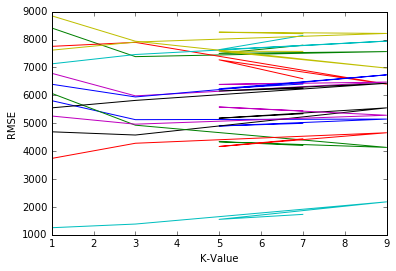

In [19]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel('K-Value')
    plt.ylabel('RMSE')
    

In [20]:
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

price                1621.019873
horsepower           4255.928054
curb_weight          4733.925570
city_mpg             5067.289050
length               5195.578604
highway_mpg          5305.356065
wheel_base           6041.023702
width                6341.624908
stroke               6415.435617
compression_ratio    7183.767345
normalized_losses    7662.105976
height               7732.374040
bore                 7782.955688
peak_rpm             8042.890401
dtype: float64

MultiVariate Test using 2-5 best features

In [21]:
def knn_train_test(X,y,df):
    shuffled = np.random.permutation(df.index)
    df = df.reindex(shuffled)
    half = int(len(df)/2)
    
    train = df.iloc[:half]
    test = df.iloc[half:]
    
    k_values = [1,3,5,7,9]
    k_rmse = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[X],train[y])
        pred = knn.predict(test[X])
        rmse = (mean_squared_error(test[y],pred)**.5)
        k_rmse[k] = rmse
        
        
    return k_rmse

k_rmse_results = {}
two_best = ['horsepower', 'curb_weight']

rmse = knn_train_test(two_best, 'price', cars_norm)
k_rmse_results['Two_Best'] = rmse

three_best = ['horsepower', 'curb_weight','width']
rmse = knn_train_test(three_best, 'price', cars_norm)
k_rmse_results['Three_Best'] = rmse

four_best = ['horsepower', 'curb_weight','width','city_mpg']
rmse = knn_train_test(four_best, 'price', cars_norm)
k_rmse_results['Four_Best'] = rmse

five_best = ['horsepower', 'curb_weight','width','city_mpg',
             'highway_mpg']
rmse = knn_train_test(five_best, 'price', cars_norm)
k_rmse_results['Five_Best'] = rmse

k_rmse_results

{'Five_Best': {1: 3965.0259122921902,
  3: 3980.7246299835879,
  5: 3960.6838085470963,
  7: 4282.2456749951125,
  9: 4316.9793074312538},
 'Four_Best': {1: 2686.1539438202326,
  3: 3096.0688207813309,
  5: 3241.3460999106433,
  7: 3390.8426813276119,
  9: 3416.253392430192},
 'Three_Best': {1: 3987.0257146781673,
  3: 3975.7045729637839,
  5: 4127.8118429852293,
  7: 4371.3072236117932,
  9: 4551.6931066658344},
 'Two_Best': {1: 2556.9449747619515,
  3: 2610.1332907304832,
  5: 2897.4057481317545,
  7: 3353.7913884600143,
  9: 3711.2763479580835}}

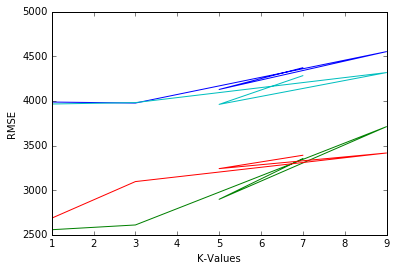

In [22]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel('K-Values')
    plt.ylabel('RMSE')

Looks like a k-value of 3 tends to be the best using 2 features.